# K-means
https://scikit-learn.org/stable/
<img src="https://mofanpy.com/static/results/sklearn/2_1_1.png">

## K-means是一種分群方法，為非監督式學習

### 1. 設定n群
### 2. K-means隨機給予n個群心
### 3. 每個點用距離公式計算並分類給最近的群
### 4. 用每一群的點重新計算群心
### 5. 重複3、4步驟直到收斂

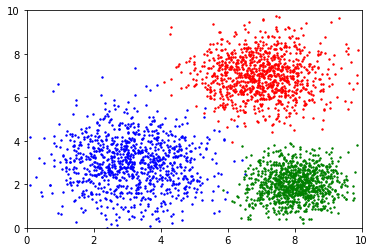

In [80]:
%matplotlib inline

import random
import numpy as np
from sklearn import cluster, metrics
import matplotlib.pyplot as plt

feature = np.array([2, 2])
for i in range(3000):
    if i%3 == 0:
        x = 3 + random.normalvariate(0, 1.2)
        y = 3 + random.normalvariate(0, 1.2)
        feature = np.vstack((feature, [x, y]))
        plt.scatter(x, y , color='b', s=2)
    elif i%3 == 1:
        x = 7 + random.normalvariate(0, 1)
        y = 7 + random.normalvariate(0, 1)
        feature = np.vstack((feature, [x, y]))
        plt.scatter(x, y , color='r', s=2)
    else:
        x = 8 + random.normalvariate(0, 0.7)
        y = 2 + random.normalvariate(0, 0.7)
        feature = np.vstack((feature, [x, y]))
        plt.scatter(x, y , color='g', s=2)
feature = feature[1:]

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

In [81]:
feature

array([[2.41555898, 2.79300381],
       [9.15587335, 7.53710776],
       [8.4253522 , 2.12103295],
       ...,
       [4.05297102, 3.2527423 ],
       [6.47290533, 8.25594685],
       [7.81252318, 2.0300723 ]])

### K-means官方文件
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

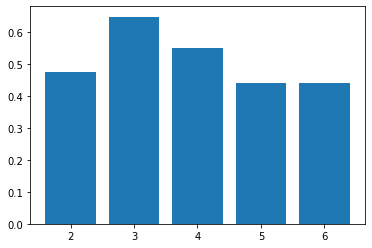

[0.47472152057650685, 0.6489590400571875, 0.5502408215433506, 0.4405618736623244, 0.4407590792541305]


In [82]:
# 迴圈
silhouette_avgs = []
ks = range(2, 7)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(feature)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(feature, cluster_labels) # -1 ~ 1
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

In [83]:
print(cluster_labels)

[3 2 0 ... 1 5 0]


In [84]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/0DGtyMBOZ-c" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')
# 出處: https://chih-sheng-huang821.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E9%9B%86%E7%BE%A4%E5%88%86%E6%9E%90-k-means-clustering-e608a7fe1b43

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# KNN(k nearest neighbors)
## KNN可以做分類或回歸，為監督式學習
### 1. 設定k值
### 2. 計算距離公式找出k個最相近的特徵
### 3. 分類: k個特徵投票、回歸: 平均k個特徵
<img src="https://ww2.mathworks.cn/matlabcentral/mlc-downloads/downloads/03faee64-e85e-4ea0-a2b4-e5964949e2d1/d99b9a4d-618c-45f0-86d1-388bdf852c1d/images/screenshot.gif">

### 蒐集資料
python MLGame.py -i ml_play_template.py -f 200 -r arkanoid NORMAL 3

In [42]:
import pickle
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

#試取資料
file = open("/Users/peggy/Documents/109-2(2-2)/Introduction to machine learning and its application to gaming/MLGame/games/arkanoid/log/third_EASY1_1.pickle", "rb")
data = pickle.load(file)
file.close()
type(data['ml'])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/peggy/Documents/109-2(2-2)/Introduction to machine learning and its application to gaming/MLGame/games/arkanoid/log/third_EASY1_1.pickle'

In [36]:
game_info = data['ml']['scene_info']
game_command = data['ml']['command']
print(game_info)
print(game_command)

[{'frame': 0, 'status': 'GAME_ALIVE', 'ball': (93, 395), 'platform': (75, 400), 'bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50)], 'hard_bricks': []}, {'frame': 1, 'status': 'GAME_ALIVE', 'ball': (93, 395), 'platform': (75, 400), 'bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50)], 'hard_bricks': []}, {'frame': 2, 'status': 'GAME_ALIVE', 'ball': (86, 388), 'platform': (70, 400), 'bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50)], 'hard_bricks': []}, {'frame': 3, 'status': 'GAME_ALIVE', 'ball': (79, 381), 'platform': (65, 400), 'bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50)], 'hard_bricks': []}, {'frame': 4, 'status': 'GAME_ALIVE', 'ball': (72, 374), 'platform': (60, 400), 'bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50)], 'hard_bricks': []}, {'frame': 5, 'status': 'GAME_ALIVE', 'ball': (65, 367), 'platform': (65, 400), 'bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50)], 'hard_bricks': []}, {'frame': 6, 'status'

In [37]:
"""
for i in range(2, 103):#EASY1
    path = "/Users/peggy/Downloads/log/" + str(i) + "mo.pickle"
    file = open(path, "rb")
    data = pickle.load(file)
    game_info = game_info + data['ml']['scene_info']
    game_command = game_command + data['ml']['command']
    file.close()
"""
for i in range(2, 6):#EASY1
    path = "/Users/peggy/Documents/109-2(2-2)/Introduction to machine learning and its application to gaming/MLGame/games/arkanoid/log/third_EASY1_" + str(i) + ".pickle"
    file = open(path, "rb")
    data = pickle.load(file)
    game_info = game_info + data['ml']['scene_info']
    game_command = game_command + data['ml']['command']
    file.close()
for i in range(1, 6):#EASY2
    path = "/Users/peggy/Documents/109-2(2-2)/Introduction to machine learning and its application to gaming/MLGame/games/arkanoid/log/third_EASY2_" + str(i) + ".pickle"
    file = open(path, "rb")
    data = pickle.load(file)
    game_info = game_info + data['ml']['scene_info']
    game_command = game_command + data['ml']['command']
    file.close()
for i in range(1, 6):#EASY3
    path = "/Users/peggy/Documents/109-2(2-2)/Introduction to machine learning and its application to gaming/MLGame/games/arkanoid/log/third_EASY3_" + str(i) + ".pickle"
    file = open(path, "rb")
    data = pickle.load(file)
    game_info = game_info + data['ml']['scene_info']
    game_command = game_command + data['ml']['command']
    file.close()
for i in range(1, 11):#NORMAL1
    path = "/Users/peggy/Documents/109-2(2-2)/Introduction to machine learning and its application to gaming/MLGame/games/arkanoid/log/third_NORM1_" + str(i) + ".pickle"
    file = open(path, "rb")
    data = pickle.load(file)
    game_info = game_info + data['ml']['scene_info']
    game_command = game_command + data['ml']['command']
    file.close()
for i in range(1, 11):#NORMAL2
    path = "/Users/peggy/Documents/109-2(2-2)/Introduction to machine learning and its application to gaming/MLGame/games/arkanoid/log/third_NORM2_" + str(i) + ".pickle"
    file = open(path, "rb")
    data = pickle.load(file)
    game_info = game_info + data['ml']['scene_info']
    game_command = game_command + data['ml']['command']
    file.close()
for i in range(1, 11):#NORMAL3
    path = "/Users/peggy/Documents/109-2(2-2)/Introduction to machine learning and its application to gaming/MLGame/games/arkanoid/log/third_NORM3_" + str(i) + ".pickle"
    file = open(path, "rb")
    data = pickle.load(file)
    game_info = game_info + data['ml']['scene_info']
    game_command = game_command + data['ml']['command']
    file.close()
for i in range(1, 41):#NORMAL5
    path = "/Users/peggy/Documents/109-2(2-2)/Introduction to machine learning and its application to gaming/MLGame/games/arkanoid/log/third_NORM5_" + str(i) + ".pickle"
    file = open(path, "rb")
    data = pickle.load(file)
    game_info = game_info + data['ml']['scene_info']
    game_command = game_command + data['ml']['command']
    file.close()
    
print(len(game_info))
print(len(game_command))

141901
141901


### 特徵整理

In [38]:
g = game_info[1]
#gprev = game_info[i - 1]
#x_velo = g['ball'][0] - gprev['ball'][0]
#y_velo = g['ball'][1] - gprev['ball'][1]
    
#feature = np.array([g['ball'][0], g['ball'][1], g['platform'][0] , 0, 0, 100])#x軸速率，沒有y軸   球上升還下降   板子往左還往右還不動
feature = np.array([g['ball'][0], g['ball'][1], g['platform'][0] +20 ,0,0,100])#mos code
print(feature)

print(game_command[1])
game_command[1] = 0

[ 93 395  95   0   0 100]
MOVE_LEFT


In [39]:
"""
for i in range(2, len(game_info) - 1):
    g = game_info[i]#des_x
    gprev = game_info[i - 1]
    x_velo = g['ball'][0] - gprev['ball'][0]
    y_velo = g['ball'][1] - gprev['ball'][1]
    plat_velo = g['platform'][0] - gprev['platform'][0]
    
    if x_velo == 7 or x_velo == -7:
        des_x = 0
        if g['ball'][1]>gprev['ball'][1]:                      #下降中
            if g['ball'][0]>gprev['ball'][0]:                  #正在往右
                des_x=(400-g['ball'][1])+g['ball'][0]  #預測球落下的位置 是球x座標加上（運動方向）球與盤子的距離
            else:                                           #正在往左
                des_x=g['ball'][0]-(400-g['ball'][1])   #同上
        if g['ball'][1]<gprev['ball'][1]:                      #正在往上
            des_x= 80                                       #不預測位置
                  #假設球是以（+-10, +- 7)的角度動的話
    else:
        if g['ball'][1]>gprev['ball'][1]:                      #下降中
            if g['ball'][0]>gprev['ball'][0]:                  #正在往右
                des_x = (400-g['ball'][1]) * 10 / 7 + g['ball'][0]   #預測球落下的位置
            else:                                           #正在往左
                des_x=g['ball'][0] - (400-g['ball'][1]) * 10 / 7   #同上
        if g['ball'][1]<gprev['ball'][1]:                      #正在往上
            des_x=100
 
    while des_x>200 or des_x<0:
        if des_x>200:
            des_x=(200-(des_x-200))
        else:
            des_x=-des_x
    
    feature = np.vstack((feature, [g['ball'][0], g['ball'][1], g['platform'][0], x_velo, y_velo, des_x]))#要加其他feature 可加板子跟球是不是同向
    if game_command[i] == "NONE": game_command[i] = 0
    elif game_command[i] == "MOVE_LEFT": game_command[i] = 1
    else: game_command[i] = 2
    
answer = np.array(game_command[1:-1])#answer跟板子有關

print(feature)
print(feature.shape)
print(answer)
print(answer.shape)
"""
for i in range(2, len(game_info) - 1):
    g = game_info[i]
    g_last = game_info[i-1]
    
    des_vx = g['ball'][0] - g_last['ball'][0]
    des_vy = g['ball'][1] - g_last['ball'][1]
    plat_velo = g['platform'][0] - g_last['platform'][0]
    
    if des_vy > 0:
        if des_vx > 0:
            des_x = (400 - g['ball'][1]) + g['ball'][0]
        else:
            des_x= g['ball'][0] - (400 - g['ball'][1])
    if des_vy < 0:
        des_x = 100
        
    while des_x > 200 or des_x < 0:
        if des_x > 200:
            des_x = 200 - (des_x - 200)
        else: 
            des_x = -des_x
        
    feature = np.vstack((feature, [g['ball'][0], g['ball'][1], g['platform'][0] + 20, des_vx, des_vy,des_x, plat_velo]))#改這行\n",
    if game_command[i] == "NONE": game_command[i] = 0
    elif game_command[i] == "MOVE_LEFT": game_command[i] = 1
    else: game_command[i] = 2 
        
answer = np.array(game_command[1:-1])
    
print(feature)
print(feature.shape)
print(answer)
print(answer.shape)

[[ 93 395  95   0   0 100]
 [ 86 388  90  -7  -7 100]
 [ 79 381  85  -7  -7 100]
 ...
 [181 385 150  -7   7 166]
 [174 392 145  -7   7 166]
 [170 399 150  -4   7 169]]
(141899, 6)
[0 1 1 ... 1 2 2]
(141899,)


### KNN官方文件
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
### 交叉驗證
https://chih-sheng-huang821.medium.com/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89-cross-validation-cv-3b2c714b18db

In [40]:
#資料劃分
x_train, x_test, y_train, y_test = train_test_split(feature, answer, test_size=0.3, random_state=9)#從前面丟feature近來
#參數區間
param_grid = {'n_neighbors':[1, 2, 3]}#板子 左 右 不動
#交叉驗證 
cv = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=12)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv, verbose=10, n_jobs=-1) #n_jobs為平行運算的數量
grid.fit(x_train, y_train)
grid_predictions = grid.predict(x_test)

#儲存
file = open('model_mosKNN_ianFILE.pickle', 'wb')
pickle.dump(grid, file)
file.close()

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    4.2s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    4.2s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    4.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.4s finished


### f1-score
https://medium.com/nlp-tsupei/precision-recall-f1-score%E7%B0%A1%E5%96%AE%E4%BB%8B%E7%B4%B9-f87baa82a47

In [41]:
#最佳參數
print(grid.best_params_)
#預測結果
#print(grid_predictions)
#混淆矩陣
print(confusion_matrix(y_test, grid_predictions))
#分類結果
print(classification_report(y_test, grid_predictions))

{'n_neighbors': 3}
[[   56   547   508]
 [  679 13521  6515]
 [  697  6355 13692]]
              precision    recall  f1-score   support

           0       0.04      0.05      0.04      1111
           1       0.66      0.65      0.66     20715
           2       0.66      0.66      0.66     20744

    accuracy                           0.64     42570
   macro avg       0.45      0.45      0.45     42570
weighted avg       0.65      0.64      0.64     42570



### 執行遊戲
python MLGame.py -i knn.py -f 50 arkanoid NORMAL 3